# BUSINESS UNDERSTANDING

## **Business Problem**

A coaching institute that prepares students for technical and data-related roles faces difficulty in structuring an effective interview preparation curriculum. With a vast number of coding and interview problems available online, the institute lacks a data-driven approach to identify which problems, topics, and company-specific patterns are most relevant for student success. As a result, training programs may not be optimally aligned with current industry interview trends, leading to inefficient preparation and reduced placement outcomes.

---

## **Business Problem Statement**

The objective of this project is to analyze interview problems sourced from online coding platforms to identify patterns related to problem difficulty, submission frequency, accuracy, and company association. By performing exploratory data analysis on these problems, the coaching institute aims to prioritize high-impact topics, structure difficulty progression, and align its curriculum with real-world interview expectations. The insights derived from this analysis will support data-driven decision-making to improve student preparedness and overall placement success.

---

## **Context**

A coaching institute relies heavily on instructor experience and generic practice material to prepare students for interviews. However, the dynamic nature of technical interviews requires continuous adaptation of training content. By leveraging problem-level data from online platforms, the institute can transition from intuition-based teaching to an evidence-driven curriculum design.

---

## **Stakeholder Perspectives**

### **1. Student Perspective**
Students often struggle to identify which problems to practice and in what sequence. A structured, data-backed learning path helps students focus on relevant problems, manage difficulty progression, and improve interview performance.

### **2. Coaching Institute Perspective**
The institute needs insights into industry-aligned problem trends to design effective training programs, allocate instructional time efficiently, and improve placement outcomes.

### **3. Trainer Perspective**
Trainers benefit from understanding which problems have low accuracy or high industry relevance, allowing them to focus on challenging and high-impact topics during instruction.

---

## **Objectives**

- Analyze interview problems based on difficulty, accuracy, submissions, and company associations.
- Identify high-priority problems and topics for interview preparation.
- Understand the relationship between problem difficulty and success rate.
- Support curriculum planning using data-driven insights.

---

## **Constraints**

### **Data Constraints**
- Incomplete or inconsistent company tagging across problems.
- Presence of multi-label categorical data.
- Noise and variability in scraped data.

### **Business Constraints**
- Limited training time for students.
- Need for curriculum adaptability to evolving interview trends.
- Avoiding bias toward specific companies or problem types.

---

## **Example Use Case Summary**

| Aspect | Description |
|------|------------|
| **Domain** | Education / Interview Preparation |
| **Business Goal** | Optimize interview preparation curriculum |
| **Stakeholders** | Students, Trainers, Coaching Institute |
| **Data Source** | Online coding problem platforms |
| **Tech Approach** | Data scraping, preprocessing, EDA |
| **Success Metric** | Improved interview performance and placement outcomes |


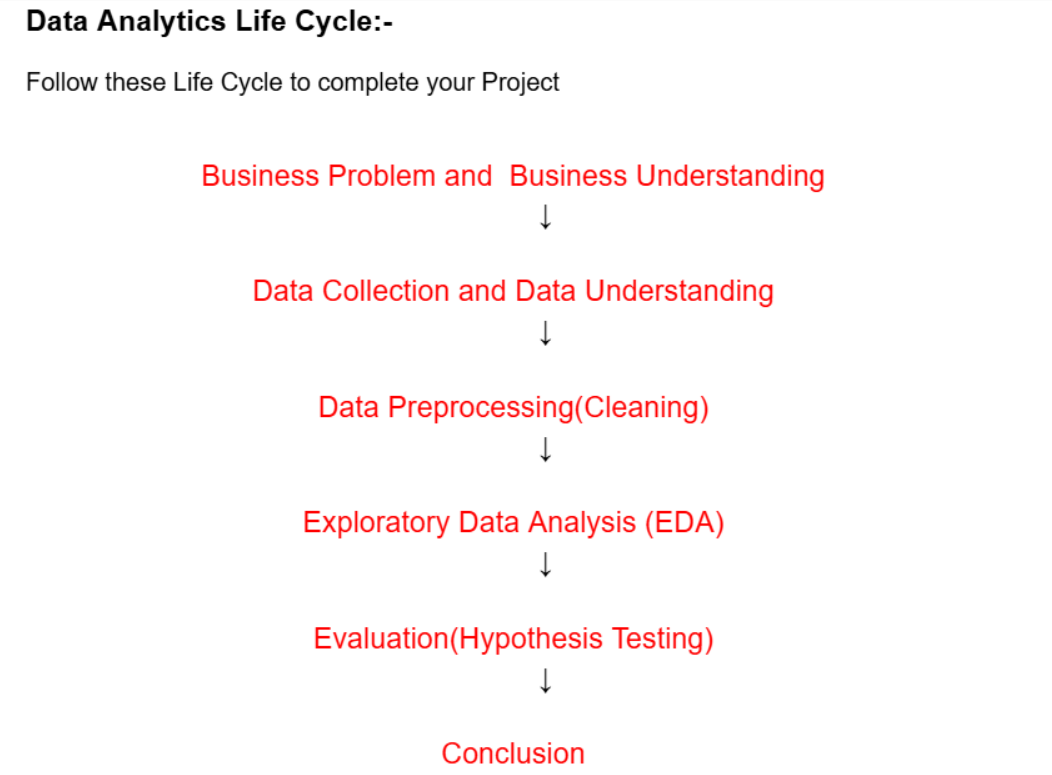

In [1]:
#!pip install selenium

In [20]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
import pyautogui

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url = "https://www.geeksforgeeks.org/explore?page=4&sortBy=submissions"
driver.get(url)
time.sleep(5)

problems = []
difficulties = []
submissions = []
accuracies = []
companiies = []

# ---------- SCROLL PAGE ----------


for _ in range(500):
    pyautogui.scroll(-2000)   # negative = scroll down
    time.sleep(1)

# --------------------
soup = BeautifulSoup(driver.page_source, "html.parser")

cards = soup.find_all("div", class_="explore_problemContainer__TStvr")
print("Cards found:", len(cards))

for card in cards:
    companies =''
    # problem name
    problem_tag = card.find("div", class_="explore_problem_name__3QSiP")
    problem = problem_tag.text.strip() if problem_tag else None

    # difficulty
    difficulty_tag = card.find("span", class_="explore_problemDifficulty__L5g_y")
    difficulty = difficulty_tag.text.strip() if difficulty_tag else None

    # submissions
    submission_tag = card.find("span", class_="explore_problemSubmissions__cGHje")
    submission = submission_tag.text.strip() if submission_tag else None

    # accuracy
    accuracy_tag = card.find("span", class_="explore_problemAccuracy__4hPJz")
    accuracy = accuracy_tag.text.strip() if accuracy_tag else None

    # Company Tags
    company_tags = card.find_all("div", class_="explore_problemCompanies__T4UoF")

    if company_tags:
        companies = ", ".join([c.text.strip() for c in company_tags])
        

    problems.append(problem)
    difficulties.append(difficulty)
    submissions.append(submission)
    accuracies.append(accuracy)
    companiies.append(companies)

driver.quit()

# ---------- DATAFRAME ----------
gfg = {
    "problem": problems,
    "difficulty": difficulties,
    "submissions": submissions,
    "accuracy": accuracies,
    "companies":companiies
}

df = pd.DataFrame(gfg)

df.to_csv("gfg_problems.csv", index=False)



Cards found: 6880


# Data Understanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'gfg_problems.csv')

In [3]:
df.head()

,problem,difficulty,submissions,accuracy,companies
0,Indexes of Subarray Sum,Medium,2M,16.5%,"Amazon, Facebook"
1,Missing in Array,Easy,2M,29.59%,"Flipkart, Morgan Stanley"
2,Second Largest,Easy,1M,26.72%,"SAP Labs, Rockstand"
3,Kadane's Algorithm,Medium,1M,36.28%,"Zoho, Flipkart"
4,Minimum Jumps,Medium,1M,11.91%,"Moonfrog Labs, Flipkart"


### Dataset Overview
- **problem**: The title of the coding or interview problem representing the concept being tested.
- **difficulty**: The difficulty level assigned to the problem (e.g., Basic, Easy, Medium, Hard).
- **submissions**: The total number of times the problem has been attempted by users, indicating popularity.
- **accuracy**: The percentage of successful submissions, reflecting problem complexity and success rate.
- **companies**: The list of companies associated with the problem, indicating real-world interview relevance.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   problem      6880 non-null   object
 1   difficulty   6880 non-null   object
 2   submissions  6880 non-null   object
 3   accuracy     6880 non-null   object
 4   companies    2410 non-null   object
dtypes: object(5)
memory usage: 268.9+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq
problem,6880,3302,Print GeeksForGeeks,10
difficulty,6880,5,Easy,2614
submissions,6880,345,2K,418
accuracy,6880,2532,50.0%,78
companies,2410,234,Amazon,332


* There are a total of 6880 problems and 3302 unique problems
* There are 5 difficulty levels and 2410 set of companie.

### DATA PREPROCESSING

In [6]:
df.isna().sum()

problem           0
difficulty        0
submissions       0
accuracy          0
companies      4470
dtype: int64

* No column has missing values except for 4470 problems are missing company tags.

In [7]:
df.duplicated().sum()

np.int64(3443)

* 3443 rows (problems) are duplicated in the dataset.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3437 entries, 0 to 3439
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   problem      3437 non-null   object
 1   difficulty   3437 non-null   object
 2   submissions  3437 non-null   object
 3   accuracy     3437 non-null   object
 4   companies    1204 non-null   object
dtypes: object(5)
memory usage: 161.1+ KB


* All the columns are in object datatype.

In [11]:
def submissions_num(x):
    if pd.isna(x):
        return None
    x = x.strip()
    if 'M' in x:
        return int(x.replace('M','')) * 1_000_000
    elif 'K' in x:
        return int(x.replace('K','')) * 1_000
    else:
        return int(x)

df['submissions'] = df['submissions'].apply(submissions_num)


In [12]:
df['accuracy'] = df['accuracy'].str.replace('%','').astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3437 entries, 0 to 3439
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   problem      3437 non-null   object 
 1   difficulty   3437 non-null   object 
 2   submissions  3437 non-null   int64  
 3   accuracy     3437 non-null   float64
 4   companies    1204 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 161.1+ KB


In [14]:
df.head()

,problem,difficulty,submissions,accuracy,companies
0,Indexes of Subarray Sum,Medium,2000000,16.50,"Amazon, Facebook"
1,Missing in Array,Easy,2000000,29.59,"Flipkart, Morgan Stanley"
2,Second Largest,Easy,1000000,26.72,"SAP Labs, Rockstand"
3,Kadane's Algorithm,Medium,1000000,36.28,"Zoho, Flipkart"
4,Minimum Jumps,Medium,1000000,11.91,"Moonfrog Labs, Flipkart"


### Univariate Analysis

In [15]:
df.columns

Index(['problem', 'difficulty', 'submissions', 'accuracy', 'companies'], dtype='object')

* There are 5 columns in the dataset they are ['problem', 'difficulty', 'submissions', 'accuracy', 'companies']

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df['difficulty'].unique()

array(['Medium', 'Easy', 'Basic', 'Hard', 'School'], dtype=object)

In [18]:
df['difficulty'].value_counts()

difficulty
Easy      1306
Medium    1169
Basic      739
Hard       222
School       1
Name: count, dtype: int64

* There are 1306 easy , 1169 medium , 739 basic , 222 Hard and only 1 School level problems.

In [19]:
df['difficulty'] = df['difficulty'].map({'School':'Easy','Easy':'Easy','Medium':'Medium','Hard':'Hard','Basic':'Basic'})

<Axes: ylabel='count'>

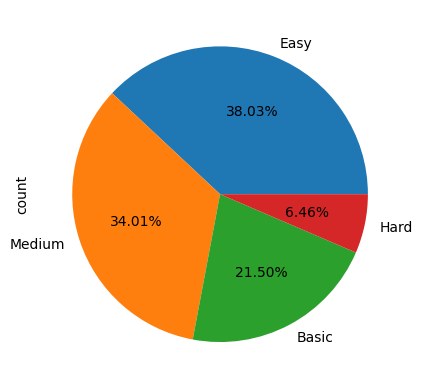

In [20]:
df['difficulty'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [21]:
sum(df['difficulty']=='School')

0

In [22]:
df['submissions'].min(),df['submissions'].max(),df['submissions'].mean()

(np.int64(964), np.int64(2000000), np.float64(54972.30957230143))

* The least no of submissions for a problem is 964 and the most are 2000000.

<Axes: ylabel='Frequency'>

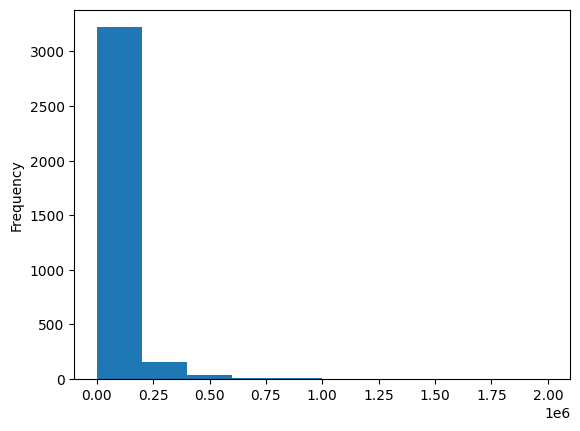

In [23]:
df['submissions'].plot(kind='hist')

The no of submissions range is in between 0 to 2M. Most of the problems have less than 250000 submissions.

In [24]:
df['accuracy'].min(),df['accuracy'].max(),df['accuracy'].mean()

(np.float64(6.23), np.float64(92.31), np.float64(48.25175152749491))

* The least accuracy for a problem is 6.23 and the highest is 92.31
* The average accuracy per problem is 48 %.

<Axes: ylabel='Frequency'>

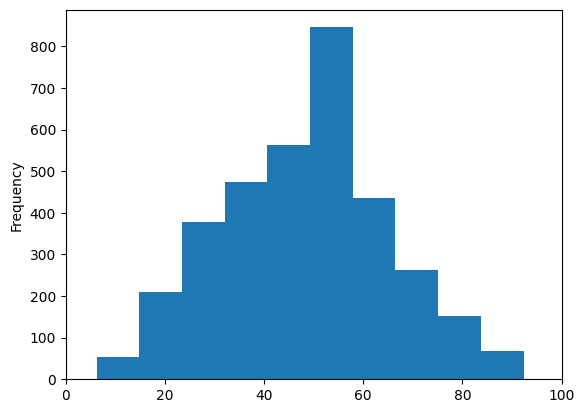

In [25]:
df['accuracy'].plot(kind='hist',xlim=[0,100])

* Most of the problems have an accuracy in between 30 - 70 % .

In [26]:
df['companies'].nunique()

234

In [27]:
df['companies'].mode()[0]

'Amazon'

In [28]:
df['companies'].value_counts().nlargest(5)

companies
Amazon               166
Amazon, Microsoft    105
Microsoft             84
Flipkart, Amazon      56
Accolite, Amazon      38
Name: count, dtype: int64

In [29]:
df['companies'].isna().sum()

np.int64(2233)

In [30]:
unique_companies = set()
for i in df[df['companies'].notna()]['companies']:
    if ',' in i:
        for j in i.split(','):
            unique_companies.add(j.strip())
    else:
        unique_companies.add(i.strip())


In [31]:
unique_companies

{'ABCO',
 'Accenture',
 'Accolite',
 'Adobe',
 'Airtel',
 'Amazon',
 'Amdocs',
 'Arcesium',
 'Atlassian',
 'BankBazaar',
 'Bidgely',
 'Bloomberg',
 'BrowserStack',
 'CGI',
 'Cisco',
 'Citrix',
 'Codenation',
 'Cognizant',
 'D-E-Shaw',
 'DE Shaw',
 'Dailyhunt',
 'Directi',
 'Drishti-Soft',
 'Dunzo',
 'Epic Systems',
 'Expedia',
 'Facebook',
 'FactSet',
 'Flipkart',
 'Freshokartz',
 'GE',
 'Goldman Sachs',
 'Google',
 'HCL',
 'HSBC',
 'Hike',
 'Housing.com',
 'HunanAsset',
 'IBM',
 'InMobi',
 'InfoEdge',
 'Infosys',
 'Intuit',
 'JUSPAY',
 'Jabong',
 'Junglee Games',
 'Juniper Networks',
 'Linkedin',
 'MAQ Software',
 'MakeMyTrip',
 'Media.net',
 'Medlife',
 'Microsoft',
 'Moonfrog Labs',
 'Morgan Stanley',
 'Myntra',
 'Nagarro',
 'National Instruments',
 'Nutanix',
 'OYO Rooms',
 'Ola Cabs',
 'Oracle',
 'Oxigen Wallet',
 'PayPal',
 'Paytm',
 'Payu',
 'PlaySimple',
 'Qualcomm',
 'Rockstand',
 'SAP Labs',
 'Salesforce',
 'Samsung',
 'Snapdeal',
 'Sprinklr',
 'Swiggy',
 'Synopsys',
 'TCS',


In [32]:
len(unique_companies)

86

* There are a total of 86 unique companies and 234 set of companies .

### MULTI VARIATE ANAL7YSIS

<Axes: xlabel='accuracy', ylabel='submissions'>

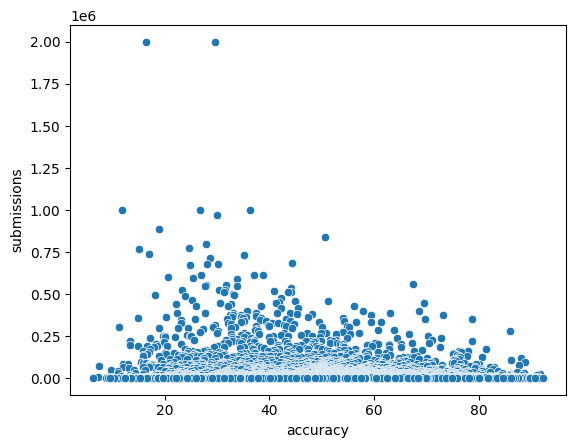

In [33]:
sns.scatterplot(df,x='accuracy',y='submissions')

* There is no strong linear relationship between accuracy and number of submissions, indicating that problem popularity is not solely driven by how easy a problem is.

In [34]:
df

,problem,difficulty,submissions,accuracy,companies
0,Indexes of Subarray Sum,Medium,2000000,16.50,"Amazon, Facebook"
1,Missing in Array,Easy,2000000,29.59,"Flipkart, Morgan Stanley"
2,Second Largest,Easy,1000000,26.72,"SAP Labs, Rockstand"
3,Kadane's Algorithm,Medium,1000000,36.28,"Zoho, Flipkart"
4,Minimum Jumps,Medium,1000000,11.91,"Moonfrog Labs, Flipkart"
...,...,...,...,...,...
3435,Make a string from another str...,Easy,978,40.62,NaN
3436,Rank Scores,Easy,978,40.12,NaN
3437,Stacking Up Discs,Easy,973,19.65,NaN
3438,English Words,Easy,971,52.16,NaN


In [35]:
df.groupby(by='difficulty')['submissions'].mean()

difficulty
Basic     34884.979702
Easy      50904.257077
Hard      44445.945946
Medium    74218.104363
Name: submissions, dtype: float64

* The average no of submissions for each difficulty levels are
    *     Basic     34884.979702
    *     Easy      50904.257077
    *     Hard      44445.945946
    *     Medium    74218.104363

In [36]:
df.groupby(by='difficulty')['accuracy'].mean()

difficulty
Basic     52.652409
Easy      48.872035
Hard      44.808198
Medium    45.430257
Name: accuracy, dtype: float64

* The average accuracy for each difficulty level is
    * Basic     52.652409
    * Easy      48.872035
    * Hard      44.808198
    * Medium    45.430257

#### 

# ANALYSIS QUESTIONS

### 1. Which problems combine high submissions and low accuracy, making them top priorities for instructor-led sessions?

In [37]:
df[(df['submissions'] > df['submissions'].quantile(0.75)) & (df['accuracy'] < df['accuracy'].quantile(0.25))]

,problem,difficulty,submissions,accuracy,companies
0,Indexes of Subarray Sum,Medium,2000000,16.50,"Amazon, Facebook"
1,Missing in Array,Easy,2000000,29.59,"Flipkart, Morgan Stanley"
2,Second Largest,Easy,1000000,26.72,"SAP Labs, Rockstand"
4,Minimum Jumps,Medium,1000000,11.91,"Moonfrog Labs, Flipkart"
5,Array Leaders,Easy,970000,29.94,"Payu, Adobe"
...,...,...,...,...,...
819,Check if two Nodes are Cousins,Medium,58000,25.99,"Amazon, D-E-Shaw"
824,Maximize dot product,Medium,58000,13.27,Directi
829,Police and Thieves,Medium,57000,34.03,Microsoft
852,Prime Pair with Target Sum,Medium,55000,27.67,NaN


* Many problems are attempted by a large number of students but still have low accuracy, showing that students struggle with these questions despite repeated practice.

### 2. What proportion of total student practice is concentrated in medium-difficulty problems?

In [38]:
df[df['difficulty'] == 'Medium']['submissions'].sum() / df['submissions'].sum()

np.float64(0.45919891490533166)

* Nearly 46% of all student practice are focused on medium-difficulty problems, showing that most learners prefer moderately challenging questions.
* This suggests that medium-difficulty problems should be given the highest priority in curriculum planning.

### 3. Do higher difficulty problems consistently show lower accuracy?

<Axes: xlabel='accuracy', ylabel='Density'>

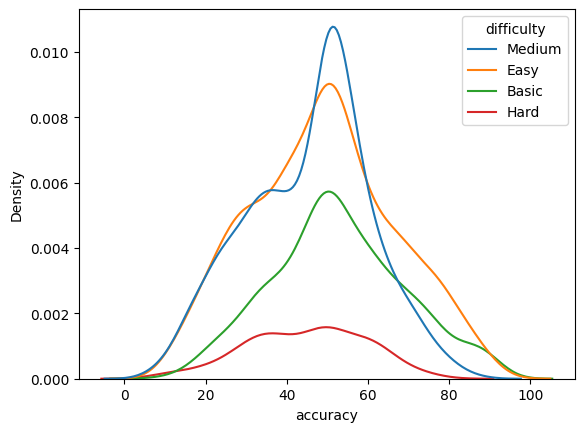

In [39]:
sns.kdeplot(df,x='accuracy',hue='difficulty')

* Accuracy clearly decreases as difficulty increases, with hard problems having the lowest success rates.
* This pattern indicates that students struggle more as problem difficulty increases, highlighting the need for guided learning for harder problems.

### 4. Which difficulty level contributes the most to overall student practice volume (in terms of total submissions)?

<Axes: ylabel='submissions'>

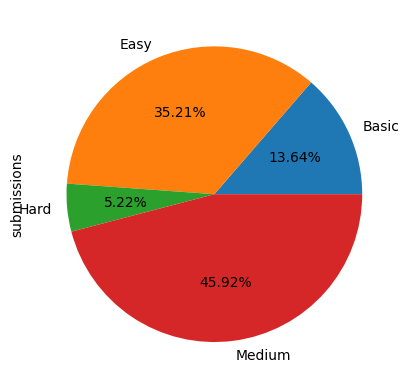

In [40]:
df.groupby(by='difficulty')['submissions'].sum().plot(kind='pie',autopct='%.2f%%')

* Medium-difficulty problems contribute the largest share of student practice, accounting for nearly half of all submissions.

* Easy problems also receive significant practice, showing that students spend time reinforcing basic concepts alongside moderate challenges.

* Hard problems contribute very little to total practice, suggesting that students may avoid very difficult questions without guided support.

### 5. What proportion of problems fall into critical accuracy bands (e.g., very low, medium, high accuracy)?

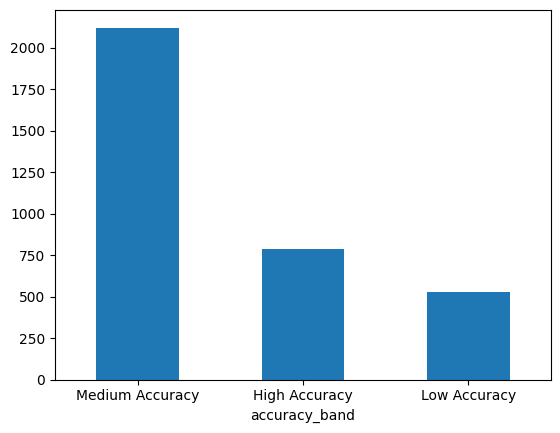

In [41]:
# Create accuracy bands
bins = [0, 30, 60, 100]
labels = ['Low Accuracy', 'Medium Accuracy', 'High Accuracy']

df['accuracy_band'] = pd.cut(df['accuracy'], bins=bins, labels=labels)


accuracy_distribution = df['accuracy_band'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

* Most problems fall into the medium-accuracy band, indicating that a large portion of questions are moderately challenging for students.

* A smaller but significant number of problems lie in the low-accuracy band, highlighting critical areas where students struggle the most.

* Relatively fewer problems achieve high accuracy, suggesting that complete mastery is limited to a smaller subset of the problem pool.

### 6. What percentage of problems have very low accuracy (e.g., below 30%), indicating critical learning for students?

In [42]:
sum(df['accuracy']<30)/len(df) * 100

15.391329647948792

* Around 15% of problems have accuracy below 30%, showing a noticeable set of questions where many students struggle.


### 7. Are there outlier problems with extremely low accuracy compared to the rest of the dataset that may require special instructional focus?

In [43]:
df[df['accuracy'] < 10].iloc[:,:4]

,problem,difficulty,submissions,accuracy
662,Number of pairs,Medium,73000,7.42
964,Closest Palindrome,Hard,47000,9.67
2750,Count Multiples of Square Numb...,Medium,5000,7.19
2825,Nth digit of pi,Hard,4000,9.01
3207,Factorial and numbers,Medium,2000,8.74
3241,Biggest integer having maximum...,Basic,2000,9.72
3261,Geometric Progression,Easy,2000,9.13
3301,Leftmost Divisor,Medium,2000,9.69
3393,Number of solutions,Easy,1000,9.62
3407,Longest Geometric Progression,Medium,1000,6.23


* A few problems have very low accuracy (below 10%), making them clear outliers in terms of difficulty.

* These outlier problems appear across different difficulty levels, showing that labels alone do not always reflect true complexity.

* Such problems should be prioritized for special instructional focus to help students overcome persistent challenges.

### 8. What proportion of total student practice (submissions) is contributed by the lowest-accuracy problems?

<Axes: ylabel='count'>

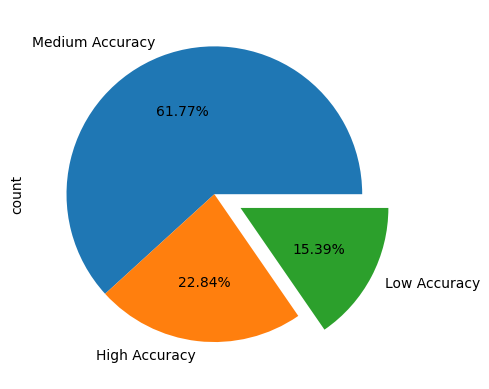

In [44]:
df['accuracy_band'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0,0.2])

* Only about 15% of problems fall into the low-accuracy group, but they represent the most challenging questions for students.

* The majority of problems lie in the medium-accuracy band, showing that most questions are moderately difficult rather than extremely easy or hard.

### 9. Is the distribution of problems balanced across difficulty levels?

In [45]:
df['difficulty'].value_counts()

difficulty
Easy      1307
Medium    1169
Basic      739
Hard       222
Name: count, dtype: int64

* The dataset is not evenly balanced, with most problems labeled as Easy and Medium.

* Hard problems form a very small portion of the dataset, indicating limited exposure to advanced-level questions.

### 10. Are company-tagged problems evenly distributed across difficulty levels ?

In [46]:
df[df['companies'].notna()]['difficulty'].value_counts()

difficulty
Medium    569
Easy      390
Basic     129
Hard      116
Name: count, dtype: int64

* Company-tagged problems are mostly concentrated in the Medium difficulty level.

* Very few company-tagged problems fall under the Hard category.

* This suggests that companies primarily expect candidates to be strong in medium-level problem-solving skills.

### 11. Do company-tagged problems receive higher average submissions than non-company-tagged problems?

In [47]:
print('Average Submissions for Problems no company tags :',df[df['companies'].isna()]['submissions'].mean())
print('Average Submissions for Problems with company tags :',df[df['companies'].notna()]['submissions'].mean())

Average Submissions for Problems no company tags : 25827.06672637707
Average Submissions for Problems with company tags : 109026.56810631229


* Problems without company tags receive much higher average submissions than company-tagged problems.

* This suggests that students practice general problems more often than company-specific ones.

* Company-tagged problems may be treated as targeted or selective practice, rather than mass practice.

### 12. Is the average accuracy lower for company-tagged problems compared to general problems?

In [48]:
print('Average Submissions for Problems no company tags :',df[df['companies'].isna()]['accuracy'].mean())
print('Average Submissions for Problems with company tags :',df[df['companies'].notna()]['accuracy'].mean())

Average Submissions for Problems no company tags : 50.47995073891625
Average Submissions for Problems with company tags : 44.11921926910299


* Company-tagged problems have lower average accuracy than non-company-tagged problems.

* This indicates that company-specific questions are generally more challenging for students.

* These problems may require additional guidance and focused preparation in coaching sessions.

#### 

### FINAL INSIGHTS 

* The dataset contains a total of 3302 problems in which there are 1307 Easy , 1169 Medium , 739 Basic and 222 Hard problems.

* Most problems fall into the medium-accuracy range, indicating moderate overall difficulty.

* Medium-difficulty problems contribute the largest share of student practice, making them the central focus of interview preparation.

* Accuracy consistently decreases as difficulty increases, confirming that harder problems need more guidance.

* Nearly 15% of problems have very low accuracy (<30%), highlighting critical areas where students struggle the most.

* Several problems combine high submissions with low accuracy, showing that students repeatedly attempt certain questions but fail to master them.

* A small number of problems have extremely low accuracy (<10%), making them clear outliers that require special instructional focus.

* Difficulty labels do not always reflect real challenge, as some Easy and Medium problems show very low accuracy.

* Company-tagged problems are mostly concentrated at the Medium difficulty level, indicating that companies emphasize strong intermediate problem-solving skills.

* Company-specific problems have lower average accuracy than general problems, making them more challenging and important for guided preparation.

* Students practice general problems more frequently than company-tagged problems, suggesting that company-specific questions are best used for focused, targeted training sessions.

#### 

### HYPOTHESIS TESTING

In [50]:
import scipy.stats as st

1. Accuracy v/s Difficulty
* Ho : Mean accuracy is the same across all difficulty levels

* Ha : Mean accuracy differs across difficulty levels

In [55]:
cl = 0.95
alpha = 1-cl

Easy = df[df['difficulty'] == 'Easy']['accuracy']
Medium = df[df['difficulty'] == 'Medium']['accuracy']
Hard = df[df['difficulty'] == 'Hard']['accuracy']
Basic = df[df['difficulty'] == 'Basic']['accuracy']

stat,p = st.f_oneway(Easy,Medium,Hard,Basic)

if p<=alpha :
    print('Reject Null Hypothesis : The Average Accuracy across difficulty levels is not same')
else:
    print('Failed to reject Null Hypothesis i.e., There is no significant relationship')

Reject Null Hypothesis : The Average Accuracy across difficulty levels is not same


2. Company Tags v/s Accuracy
* H₀ (Null Hypothesis) : There is no significant difference in mean accuracy between company-tagged and non-company-tagged problems.

* Ha (Alternative Hypothesis) : Company-tagged problems have significantly lower mean accuracy than non-company-tagged problems.

In [57]:
company_ = df[df['companies'].notna()]['accuracy']
non_company_ = df[df['companies'].isna()]['accuracy']

stat, p = st.f_oneway(company_, non_company_)

if p <= 0.05:
    print('Reject Null Hypothesis: Company-tagged problems have different accuracy')
else:
    print('Fail to reject Null Hypothesis: No significant difference in accuracy')


Reject Null Hypothesis: Company-tagged problems have different accuracy


3. Company tags v/s Submissions.
* H₀ (Null Hypothesis): There is no significant difference in mean submissions between company-tagged and non-company-tagged problems.

* H₁ (Alternative Hypothesis): Company-tagged problems receive significantly higher submissions than non-company-tagged problems.

In [58]:
company_ = df[df['companies'].notna()]['submissions']
non_company_ = df[df['companies'].isna()]['submissions']

stat, p = st.f_oneway(company_, non_company_)

if p <= 0.05:
    print('Reject Null Hypothesis: Submissions differ between company-tagged and non-company-tagged problems')
else:
    print('Fail to reject Null Hypothesis: No significant difference in submissions')


Reject Null Hypothesis: Submissions differ between company-tagged and non-company-tagged problems


4. Difficulty v/s Company tags
* H₀ (Null Hypothesis): Difficulty level and company tagging are independent of each other.

* H₁ (Alternative Hypothesis): Difficulty level and company tagging are associated.

In [61]:
observed = pd.crosstab(df['difficulty'], df['companies'].notna())

chi2, p, dof, expected = st.chi2_contingency(observed)

if p <= 0.05:
    print('Reject Null Hypothesis: Difficulty and company tagging are associated')
else:
    print('Fail to reject Null Hypothesis: No association between difficulty and company tagging')


Reject Null Hypothesis: Difficulty and company tagging are associated


5. Accuracy v/s Submissions
* H₀ (Null Hypothesis): There is no significant relationship between the number of submissions and the accuracy of problems.
  
* H₁ (Alternative Hypothesis): There is a significant relationship between the number of submissions and the accuracy of problems.

In [69]:
df['accuracy'].corr(df['submissions'])

np.float64(-0.1532835202840004)

There is a weak relation between Accuracy and Submissions.Hence there is no significant relationship between the number of submissions and the accuracy of the problems